<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Raajitha_Chap2_MIMIC_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/iupui-soic/handson-ml-mimic-iv.git

Cloning into 'handson-ml-mimic-iv'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 83 (delta 29), reused 40 (delta 13), pack-reused 0
Receiving objects: 100% (83/83), 3.86 MiB | 14.60 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from mimic.Mimic import MIMIC, MIMICManipulations
from utils.util import generic_utils
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
generic_util_instance = generic_utils()

In [6]:
df = pd.read_csv('/content/drive/MyDrive/ch_02_end_to_end_ml.csv')

In [7]:
df.head()

,subject_id,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,hospital_expire_flag,...,drg_code,medication,event_txt,drug,route,org_name,test_name,quantity,ab_name,curr_service
0,10000032,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,0,...,283.0,Potassium Chloride,Administered,Acetaminophen,PO/NG,NaN,TOXOPLASMA IgG ANTIBODY,NaN,NaN,MED
1,10000068,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MED
2,10000084,EW EMER.,P6957U,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,0,...,42.0,Pramipexole,Administered,QUEtiapine Fumarate,PO/NG,NaN,"Blood Culture, Routine",NaN,NaN,MED
3,10000108,EU OBSERVATION,P38XXV,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,...,NaN,NaN,NaN,NaN,NaN,ACTINOBACILLUS ACTINOMYCETEMCOMITANS,WOUND CULTURE,NaN,NaN,MED
4,10000117,EU OBSERVATION,P2358X,EMERGENCY ROOM,NaN,Other,ENGLISH,DIVORCED,WHITE,0,...,308.0,Influenza Vaccine Quadrivalent,Hold Dose,Heparin,SC,CAMPYLOBACTER JEJUNI,CAMPYLOBACTER CULTURE,NaN,NaN,MED


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180677 entries, 0 to 180676
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject_id            180677 non-null  int64  
 1   admission_type        180677 non-null  object 
 2   admit_provider_id     180676 non-null  object 
 3   admission_location    180677 non-null  object 
 4   discharge_location    128343 non-null  object 
 5   insurance             180677 non-null  object 
 6   language              180677 non-null  object 
 7   marital_status        173425 non-null  object 
 8   race                  180677 non-null  object 
 9   hospital_expire_flag  180677 non-null  int64  
 10  los_admission         180677 non-null  float64
 11  gender                180677 non-null  object 
 12  anchor_age            180677 non-null  int64  
 13  eventtype             180677 non-null  object 
 14  careunit              126370 non-null  object 
 15  

In [11]:
df.shape

(180677, 28)

In [12]:
df.columns

Index(['subject_id', 'admission_type', 'admit_provider_id',
       'admission_location', 'discharge_location', 'insurance', 'language',
       'marital_status', 'race', 'hospital_expire_flag', 'los_admission',
       'gender', 'anchor_age', 'eventtype', 'careunit', 'diagnosis_icd_code',
       'procedures_icd_code', 'drg_type', 'drg_code', 'medication',
       'event_txt', 'drug', 'route', 'org_name', 'test_name', 'quantity',
       'ab_name', 'curr_service'],
      dtype='object')

In [13]:
df.dtypes

subject_id                int64
admission_type           object
admit_provider_id        object
admission_location       object
discharge_location       object
insurance                object
language                 object
marital_status           object
race                     object
hospital_expire_flag      int64
los_admission           float64
gender                   object
anchor_age                int64
eventtype                object
careunit                 object
diagnosis_icd_code       object
procedures_icd_code      object
drg_type                 object
drg_code                float64
medication               object
event_txt                object
drug                     object
route                    object
org_name                 object
test_name                object
quantity                float64
ab_name                  object
curr_service             object
dtype: object

In [14]:
df.describe()

,subject_id,hospital_expire_flag,los_admission,anchor_age,drg_code,quantity
count,1.806770e+05,180677.000000,180677.000000,180677.000000,144396.000000,0.0
mean,1.501326e+07,0.028620,4.209422,55.375034,344.668758,NaN
std,2.884716e+06,0.166737,6.199334,20.268894,239.510152,NaN
min,1.000003e+07,0.000000,0.000694,18.000000,1.000000,NaN
25%,1.250880e+07,0.000000,0.979861,39.000000,166.000000,NaN
50%,1.502097e+07,0.000000,2.563194,57.000000,283.000000,NaN
75%,1.751168e+07,0.000000,4.938889,71.000000,530.000000,NaN
max,1.999999e+07,1.000000,249.585417,91.000000,989.000000,NaN


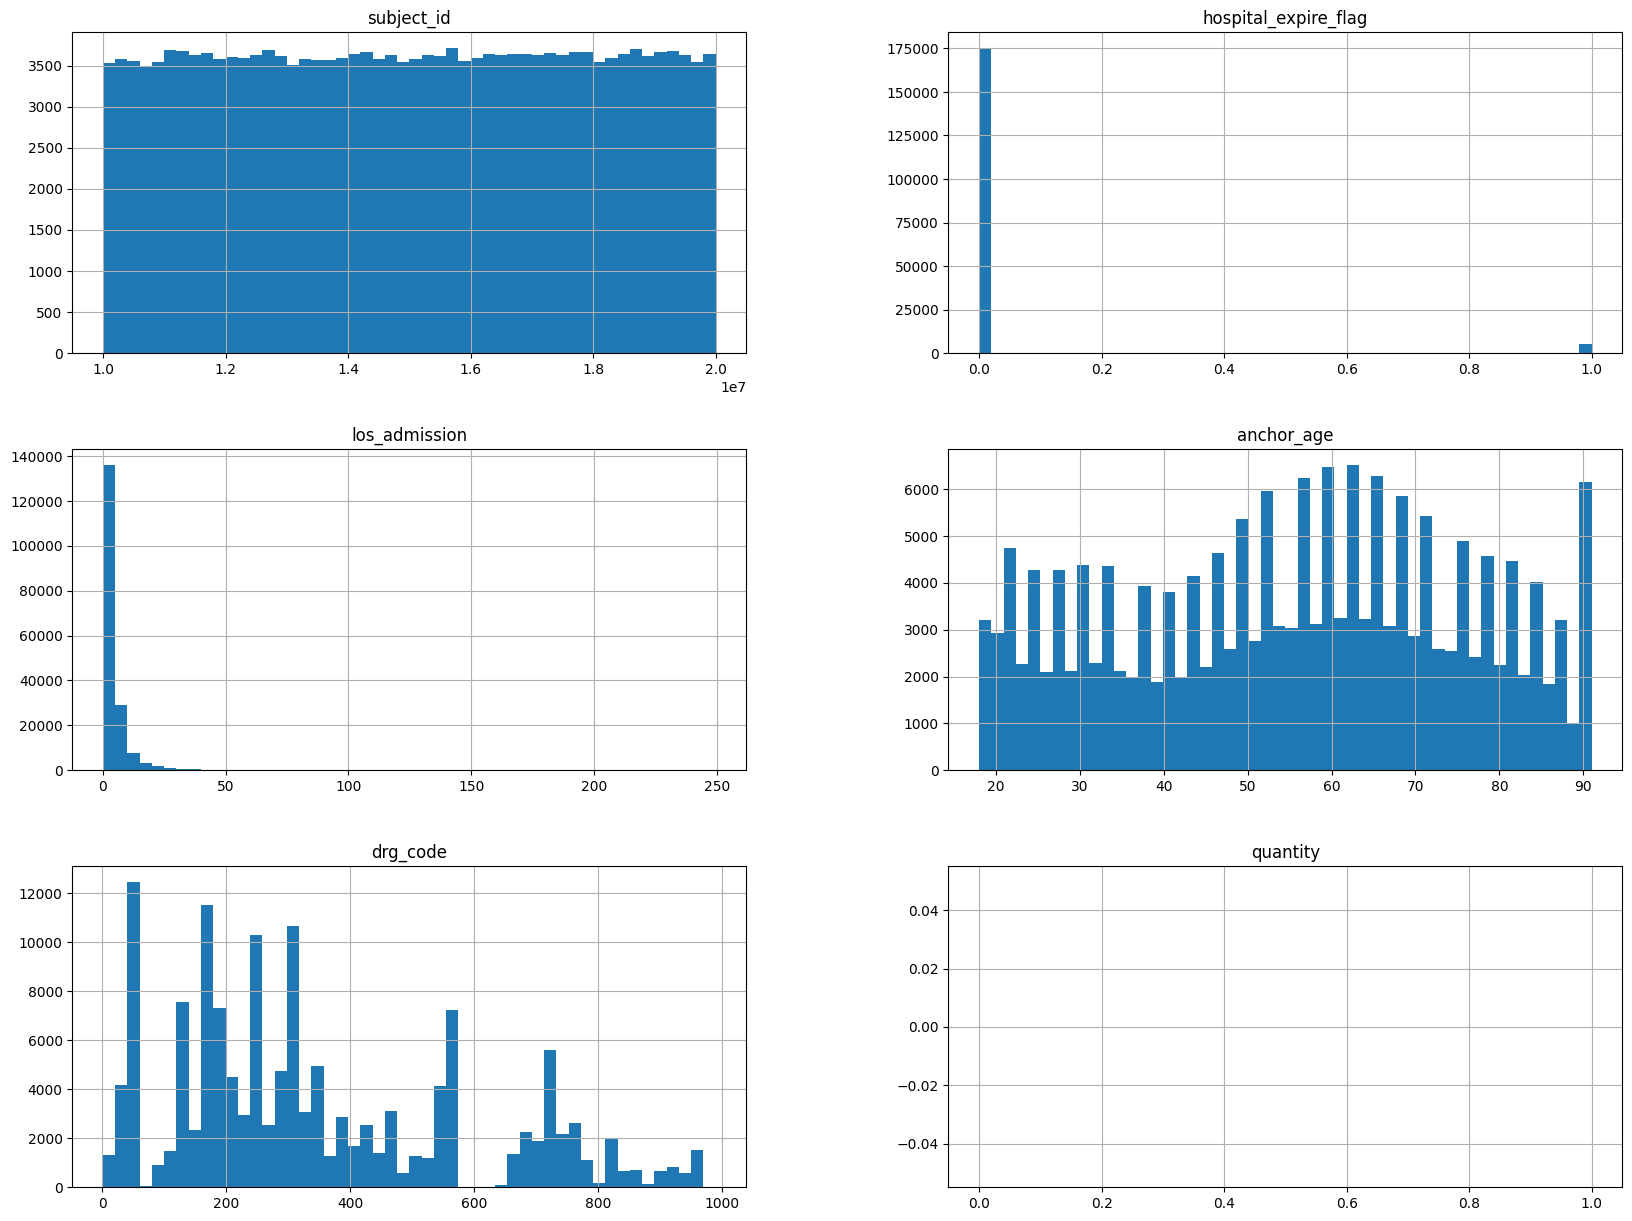

In [15]:
df.hist(bins=50, figsize=(20,15))
plt.show()

###Data Cleaning

In [16]:
df.drop(['subject_id', 'admit_provider_id', 'quantity', 'diagnosis_icd_code', 'procedures_icd_code'], axis=1, inplace = True)

In [17]:
df.head()

,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,hospital_expire_flag,los_admission,gender,...,drg_type,drg_code,medication,event_txt,drug,route,org_name,test_name,ab_name,curr_service
0,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,0,0.786111,F,...,APR,283.0,Potassium Chloride,Administered,Acetaminophen,PO/NG,NaN,TOXOPLASMA IgG ANTIBODY,NaN,MED
1,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,0.298611,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MED
2,EW EMER.,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,0,4.538889,M,...,APR,42.0,Pramipexole,Administered,QUEtiapine Fumarate,PO/NG,NaN,"Blood Culture, Routine",NaN,MED
3,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,0.407639,M,...,NaN,NaN,NaN,NaN,NaN,NaN,ACTINOBACILLUS ACTINOMYCETEMCOMITANS,WOUND CULTURE,NaN,MED
4,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,DIVORCED,WHITE,0,0.532639,F,...,APR,308.0,Influenza Vaccine Quadrivalent,Hold Dose,Heparin,SC,CAMPYLOBACTER JEJUNI,CAMPYLOBACTER CULTURE,NaN,MED


In [18]:
df.shape

(180677, 23)

In [19]:
df.admission_type.value_counts()

admission_type
EW EMER.                       60396
EU OBSERVATION                 43178
URGENT                         22710
OBSERVATION ADMIT              20827
SURGICAL SAME DAY ADMISSION    15566
DIRECT OBSERVATION              7228
DIRECT EMER.                    4866
ELECTIVE                        3530
AMBULATORY OBSERVATION          2376
Name: count, dtype: int64

In [20]:
df.admission_type.isna().sum()

0

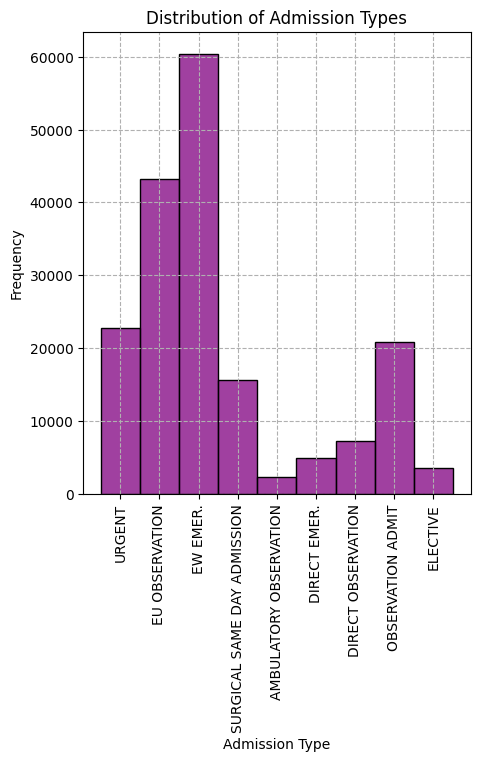

In [21]:
plt.figure(figsize=(5,6))
ax= sns.histplot(df['admission_type'], bins=50, kde=False, color='purple', edgecolor = 'black')
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.title('Distribution of Admission Types')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [22]:
df.admission_location.value_counts()

admission_location
EMERGENCY ROOM                            96829
PHYSICIAN REFERRAL                        46887
TRANSFER FROM HOSPITAL                    20228
WALK-IN/SELF REFERRAL                      6577
CLINIC REFERRAL                            2717
PROCEDURE SITE                             2673
PACU                                       2094
INTERNAL TRANSFER TO OR FROM PSYCH         1261
TRANSFER FROM SKILLED NURSING FACILITY     1101
INFORMATION NOT AVAILABLE                   217
AMBULATORY SURGERY TRANSFER                  93
Name: count, dtype: int64

In [23]:
df.admission_location.isna().sum()

0

In [24]:
df = generic_util_instance.replace_nan(df, 'admission_location', 'Other')

In [25]:
df = generic_util_instance.replace_column_value(df, 'admission_location', 3000, 'Other')
df.admission_location.value_counts()

admission_location
EMERGENCY ROOM            96829
PHYSICIAN REFERRAL        46887
TRANSFER FROM HOSPITAL    20228
Other                     10156
WALK-IN/SELF REFERRAL      6577
Name: count, dtype: int64

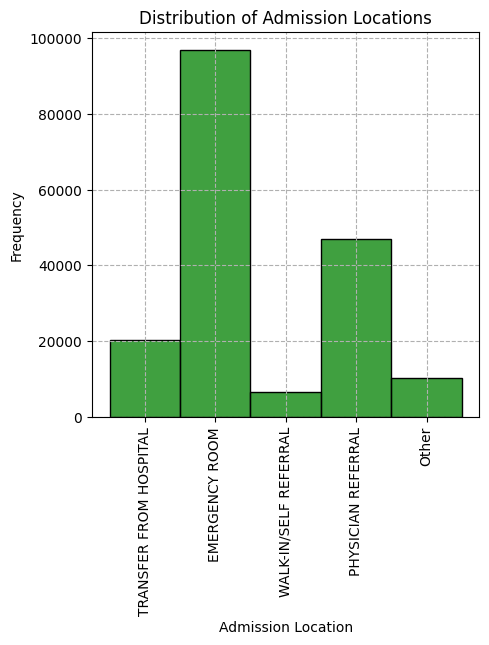

In [26]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['admission_location'], bins=50, kde=False, color='green')
plt.xlabel('Admission Location')
plt.ylabel('Frequency')
plt.title('Distribution of Admission Locations')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [27]:
df.discharge_location.value_counts()


discharge_location
HOME                            67908
HOME HEALTH CARE                25796
SKILLED NURSING FACILITY        16844
REHAB                            5354
DIED                             5106
CHRONIC/LONG TERM ACUTE CARE     2484
HOSPICE                          1469
PSYCH FACILITY                    980
AGAINST ADVICE                    832
ACUTE HOSPITAL                    796
OTHER FACILITY                    540
ASSISTED LIVING                   211
HEALTHCARE FACILITY                23
Name: count, dtype: int64

In [28]:
df.discharge_location.isna().sum()

52334

In [29]:
df = generic_util_instance.replace_nan(df, 'discharge_location', 'Other')

In [30]:
df.discharge_location.isna().sum()

0

In [31]:
df = generic_util_instance.replace_column_value(df, 'discharge_location', 1000, 'Other')
df.discharge_location.value_counts()

discharge_location
HOME                            67908
Other                           55716
HOME HEALTH CARE                25796
SKILLED NURSING FACILITY        16844
REHAB                            5354
DIED                             5106
CHRONIC/LONG TERM ACUTE CARE     2484
HOSPICE                          1469
Name: count, dtype: int64

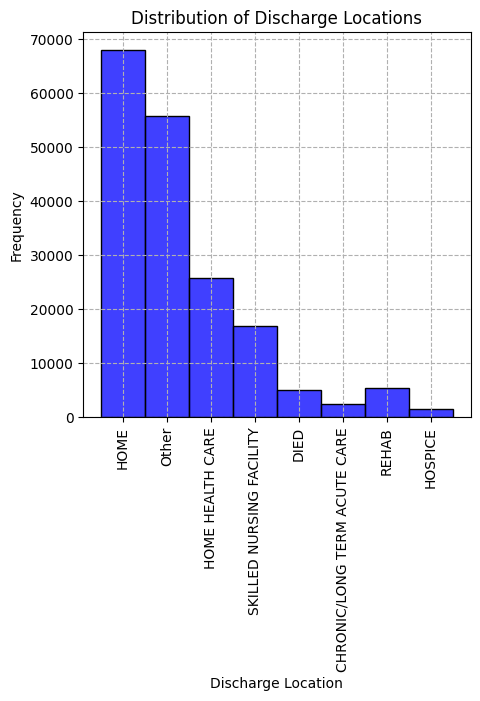

In [32]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['discharge_location'], bins=50, kde=False, color='blue')
plt.xlabel('Discharge Location')
plt.ylabel('Frequency')
plt.title('Distribution of Discharge Locations')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [33]:
df.insurance.value_counts()

insurance
Other       110008
Medicare     55577
Medicaid     15092
Name: count, dtype: int64

In [34]:
df.insurance.isna().sum()

0

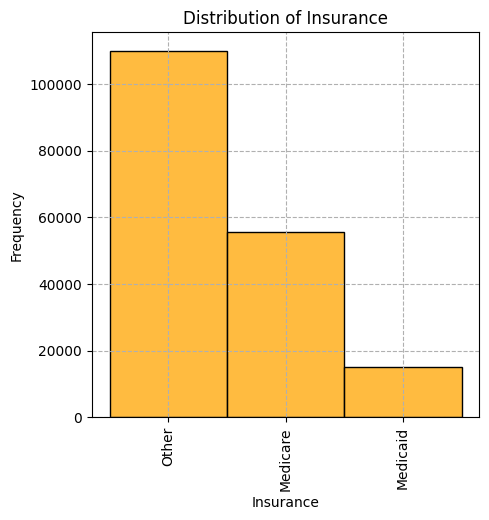

In [35]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['insurance'], bins=50, kde=False, color='orange', edgecolor= 'black')
plt.xlabel('Insurance')
plt.ylabel('Frequency')
plt.title('Distribution of Insurance')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [36]:
df.language.value_counts()


language
ENGLISH    163350
?           17327
Name: count, dtype: int64

In [37]:
df.language.isna().sum()

0

In [38]:
df = generic_util_instance.replace_column_value(df, 'language', 18000, 'Other')
df.language.value_counts()

language
ENGLISH    163350
Other       17327
Name: count, dtype: int64

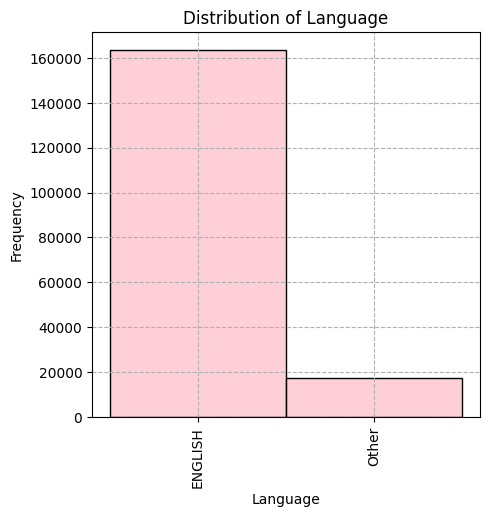

In [39]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['language'], bins=50, kde=False, color='pink', edgecolor='black')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.title('Distribution of Language')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [40]:
df.marital_status.value_counts()

marital_status
MARRIED     77798
SINGLE      67537
WIDOWED     16725
DIVORCED    11365
Name: count, dtype: int64

In [41]:
df.marital_status.isna().sum()

7252

In [42]:
df = generic_util_instance.replace_nan(df, 'marital_status', 'Other')
df.marital_status.value_counts()

marital_status
MARRIED     77798
SINGLE      67537
WIDOWED     16725
DIVORCED    11365
Other        7252
Name: count, dtype: int64

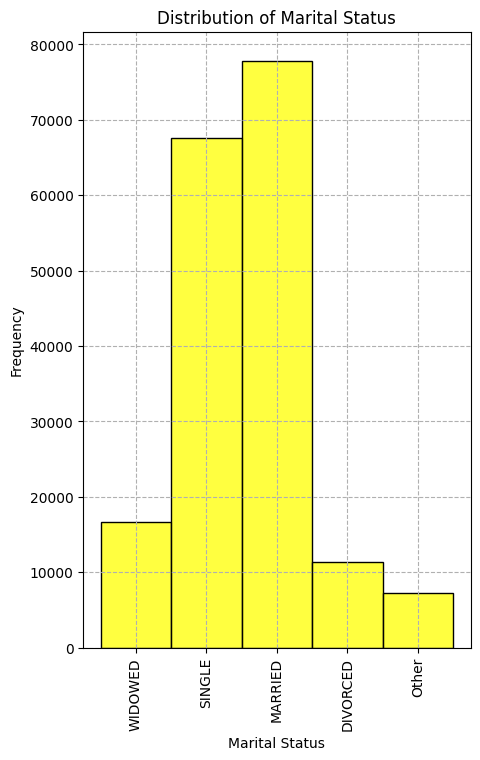

In [43]:
plt.figure(figsize=(5, 8))
ax = sns.histplot(df['marital_status'], bins=50, kde=False, color='yellow', edgecolor = 'black')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Distribution of Marital Status')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [44]:
df.hospital_expire_flag.value_counts()

hospital_expire_flag
0    175506
1      5171
Name: count, dtype: int64

In [45]:
df.hospital_expire_flag.isna().sum()

0

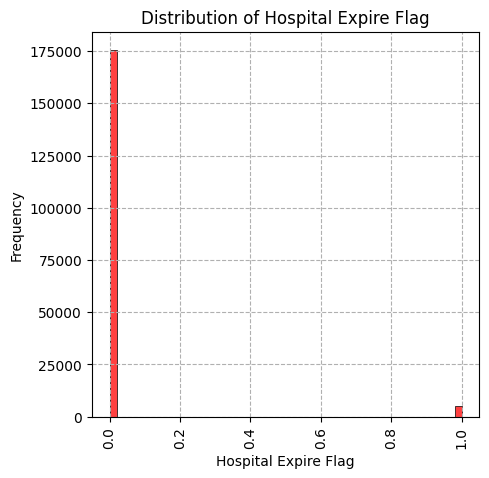

In [46]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['hospital_expire_flag'], bins=50, kde=False, color='red', edgecolor = 'black')
plt.xlabel('Hospital Expire Flag')
plt.ylabel('Frequency')
plt.title('Distribution of Hospital Expire Flag')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [47]:
df.gender.value_counts()

gender
F    95698
M    84979
Name: count, dtype: int64

In [48]:
df.gender.isna().sum()

0

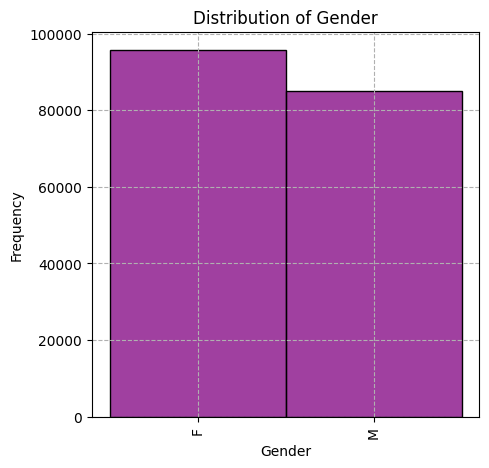

In [49]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['gender'], bins=50, kde=False, color='purple', edgecolor = 'black')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [50]:
df.race.value_counts()

race
WHITE                                        114983
BLACK/AFRICAN AMERICAN                        19300
UNKNOWN                                        8037
OTHER                                          7475
ASIAN                                          3475
WHITE - OTHER EUROPEAN                         3204
HISPANIC OR LATINO                             3114
HISPANIC/LATINO - PUERTO RICAN                 2759
ASIAN - CHINESE                                2559
BLACK/CAPE VERDEAN                             1886
HISPANIC/LATINO - DOMINICAN                    1769
WHITE - RUSSIAN                                1639
BLACK/AFRICAN                                  1143
BLACK/CARIBBEAN ISLAND                         1076
UNABLE TO OBTAIN                               1075
PATIENT DECLINED TO ANSWER                      971
ASIAN - SOUTH EAST ASIAN                        636
ASIAN - ASIAN INDIAN                            581
HISPANIC/LATINO - GUATEMALAN                    564
WHITE -

In [51]:
df.race.isna().sum()

0

In [52]:
df = generic_util_instance.replace_column_value(df, 'race', 4000, 'Other')
df.race.value_counts()

race
WHITE                     114983
Other                      30882
BLACK/AFRICAN AMERICAN     19300
UNKNOWN                     8037
OTHER                       7475
Name: count, dtype: int64

In [53]:
df['race'] = df['race'].replace('OTHER', 'Other')
df.race.value_counts()


race
WHITE                     114983
Other                      38357
BLACK/AFRICAN AMERICAN     19300
UNKNOWN                     8037
Name: count, dtype: int64

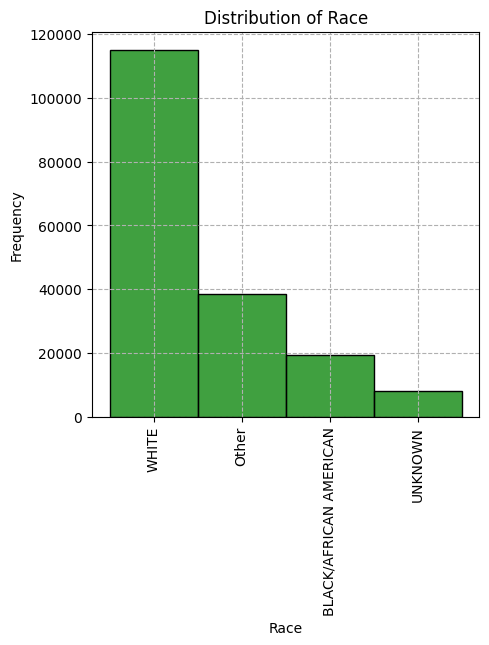

In [54]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['race'], bins=50, kde=False, color='green', edgecolor = 'black')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Distribution of Race')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [55]:
df.anchor_age.value_counts()

anchor_age
91    6150
63    3271
60    3255
62    3252
61    3242
      ... 
86    1840
87    1653
88    1556
18    1222
89     987
Name: count, Length: 73, dtype: int64

In [56]:
df.anchor_age.isna().sum()

0

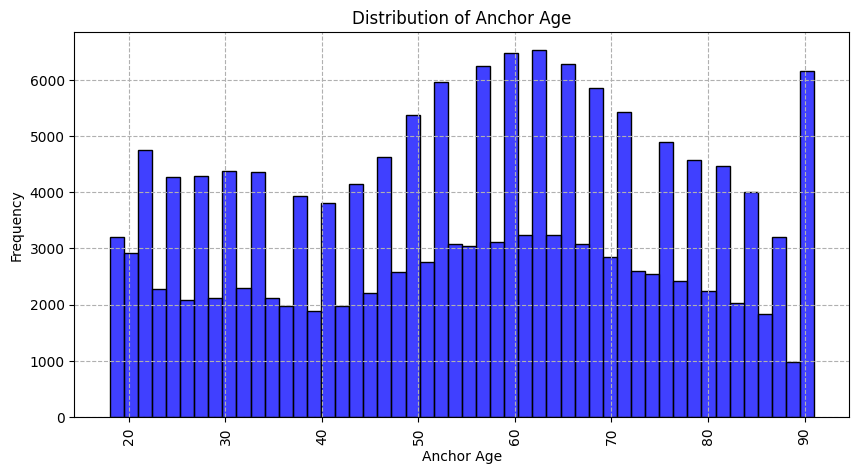

In [57]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(df['anchor_age'], bins=50, kde=False, color='blue', edgecolor = 'black')
plt.xlabel('Anchor Age')
plt.ylabel('Frequency')
plt.title('Distribution of Anchor Age')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [58]:
df.eventtype.value_counts()

eventtype
admit        54394
discharge    54307
transfer     36120
ED           35856
Name: count, dtype: int64

In [59]:
df.eventtype.isna().sum()

0

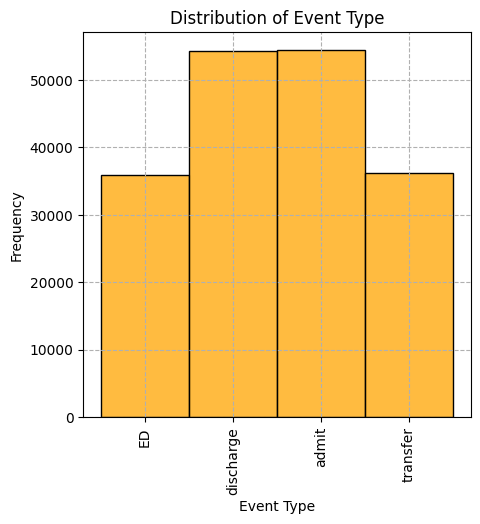

In [60]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['eventtype'], bins=50, kde=False, color='orange', edgecolor = 'black')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.title('Distribution of Event Type')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [61]:
df.careunit.value_counts()

careunit
Emergency Department                                35856
Medicine                                            14181
Emergency Department Observation                    11299
Discharge Lounge                                     5909
Neurology                                            4902
Med/Surg                                             4823
Medicine/Cardiology                                  4539
Labor & Delivery                                     3613
Med/Surg/Trauma                                      3316
Med/Surg/GYN                                         3089
Vascular                                             2588
Obstetrics (Postpartum & Antepartum)                 2524
Surgery/Trauma                                       2412
PACU                                                 2356
Hematology/Oncology                                  2176
Transplant                                           1983
Cardiac Surgery                                      1954
Medic

In [62]:
df.careunit.isna().sum()

54307

In [63]:
df.drop(['careunit'], axis=1, inplace=True)

In [64]:
df.shape

(180677, 22)

In [65]:
df.drg_type.value_counts()

drg_type
APR     137699
HCFA      6697
Name: count, dtype: int64

In [66]:
df.drg_type.isna().sum()

36281

In [67]:
df = generic_util_instance.replace_nan(df, 'drg_type', 'Other')
df.drg_type.value_counts()

drg_type
APR      137699
Other     36281
HCFA       6697
Name: count, dtype: int64

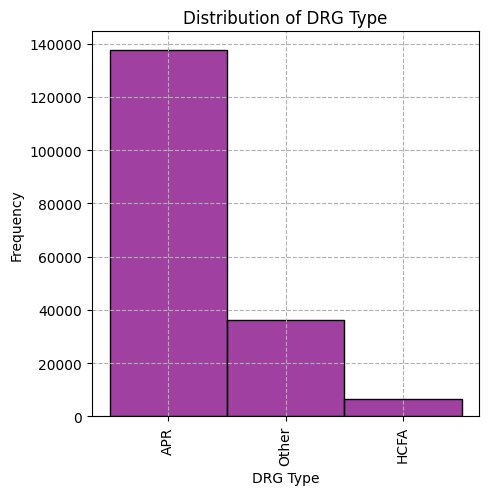

In [68]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['drg_type'], bins=50, kde=False, color='purple', edgecolor = 'black')
plt.xlabel('DRG Type')
plt.ylabel('Frequency')
plt.title('Distribution of DRG Type')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [69]:
df.drg_code.isna().sum()

36281

In [70]:
df = generic_util_instance.replace_nan(df, 'drg_code', '0.0')
df.drg_code.value_counts()

drg_code
0.0      36281
560.0     6263
540.0     3580
720.0     3548
45.0      2531
         ...  
983.0        1
639.0        1
31.0         1
698.0        1
707.0        1
Name: count, Length: 400, dtype: int64

In [71]:
df.drug.value_counts()

drug
Sodium Chloride 0.9%  Flush                                       9156
Acetaminophen                                                     7995
Heparin                                                           5161
0.9% Sodium Chloride                                              5044
Docusate Sodium                                                   4991
                                                                  ... 
*NF* galanta                                                         1
MetFORMIN                                                            1
famciclovir                                                          1
dexlansoprazole                                                      1
Acetylcysteine Inhaled – For interventional pulmonary use only       1
Name: count, Length: 1621, dtype: int64

In [72]:
df.drug.isna().sum()

22293

In [73]:
df = generic_util_instance.replace_nan(df, 'drug', 'Other')
df.drug.value_counts()

drug
Other                                                             22293
Sodium Chloride 0.9%  Flush                                        9156
Acetaminophen                                                      7995
Heparin                                                            5161
0.9% Sodium Chloride                                               5044
                                                                  ...  
*NF* galanta                                                          1
MetFORMIN                                                             1
famciclovir                                                           1
dexlansoprazole                                                       1
Acetylcysteine Inhaled – For interventional pulmonary use only        1
Name: count, Length: 1622, dtype: int64

In [74]:
df = generic_util_instance.replace_column_value(df, 'drug', 3000, 'Other')
df.drug.value_counts()

drug
Other                          134875
Sodium Chloride 0.9%  Flush      9156
Acetaminophen                    7995
Heparin                          5161
0.9% Sodium Chloride             5044
Docusate Sodium                  4991
Insulin                          3584
Senna                            3430
Ondansetron                      3276
HYDROmorphone (Dilaudid)         3165
Name: count, dtype: int64

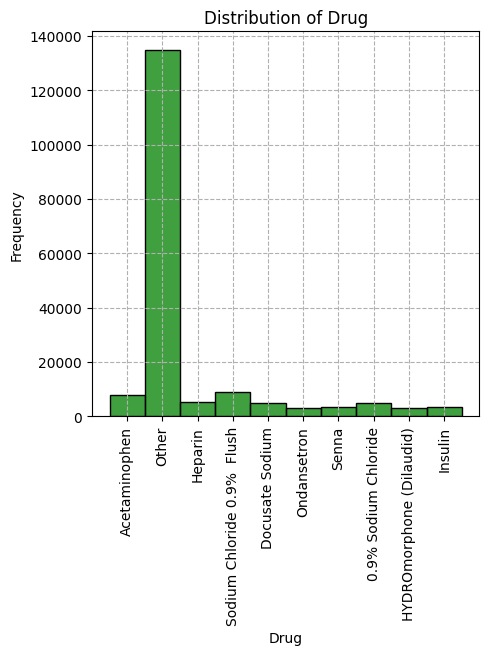

In [75]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['drug'], bins=50, kde=False, color='green', edgecolor = 'black')
plt.xlabel('Drug')
plt.ylabel('Frequency')
plt.title('Distribution of Drug')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [76]:
df.route.value_counts()

route
IV             49211
PO/NG          42275
PO             38260
SC              9397
IM              6183
               ...  
TT                 1
BU                 1
PO/OG              1
TRANSDERMAL        1
NG/OG              1
Name: count, Length: 62, dtype: int64

In [77]:

df.route.isna().sum()

22335

In [78]:
df = generic_util_instance.replace_nan(df, 'route', 'Other')
df.route.value_counts()

route
IV             49211
PO/NG          42275
PO             38260
Other          22335
SC              9397
               ...  
TT                 1
BU                 1
PO/OG              1
TRANSDERMAL        1
NG/OG              1
Name: count, Length: 63, dtype: int64

In [79]:
df = generic_util_instance.replace_column_value(df, 'route', 2500, 'Other')
df.route.value_counts()

route
IV       49211
PO/NG    42275
PO       38260
Other    35351
SC        9397
IM        6183
Name: count, dtype: int64

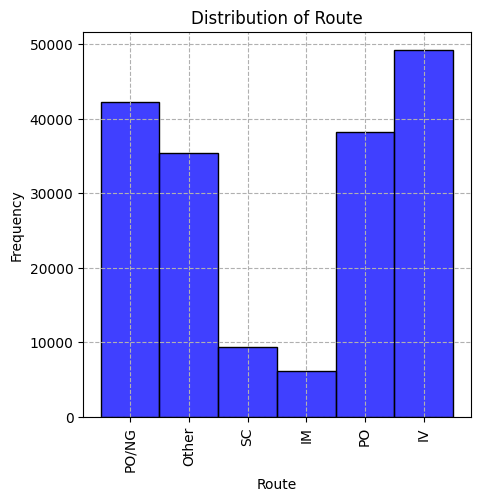

In [80]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['route'], bins=50, kde=False, color='blue', edgecolor = 'black')
plt.xlabel('Route')
plt.ylabel('Frequency')
plt.title('Distribution of Route')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [81]:
df.org_name.value_counts()

org_name
ESCHERICHIA COLI                      4148
CANCELLED                             3323
STAPH AUREUS COAG +                   2883
GRAM POSITIVE BACTERIA                1762
STAPHYLOCOCCUS, COAGULASE NEGATIVE    1078
                                      ... 
ASPERGILLUS SPECIES                      1
STREPTOCOCCUS MITIS/ORALIS               1
CANDIDA SPECIES                          1
CUTIBACTERIUM ACNES                      1
DIALISTER MICRAEROPHILUS                 1
Name: count, Length: 276, dtype: int64

In [82]:
df.org_name.isna().sum()

159380

In [83]:
df = generic_util_instance.replace_nan(df, 'org_name', 'None')
df = generic_util_instance.replace_column_value(df, 'org_name', 1500, 'Other')
df.org_name.value_counts()

org_name
None                      159380
Other                       9181
ESCHERICHIA COLI            4148
CANCELLED                   3323
STAPH AUREUS COAG +         2883
GRAM POSITIVE BACTERIA      1762
Name: count, dtype: int64

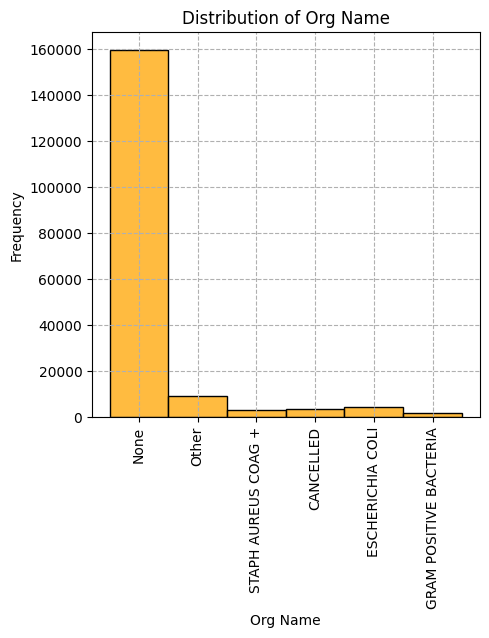

In [84]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['org_name'], bins=50, kde=False, color='orange', edgecolor = 'black')
plt.xlabel('Org Name')
plt.ylabel('Frequency')
plt.title('Distribution of Org Name')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [85]:
df.test_name.value_counts()

test_name
URINE CULTURE                       49569
Blood Culture, Routine              36755
MRSA SCREEN                         11650
RAPID PLASMA REAGIN TEST             5320
GRAM STAIN                           4538
                                    ...  
HCV GENOTYPE                            1
MICROSPORIDIA STAIN                     1
TISSUE CULTURE-CVS                      1
EPSTEIN-BARR VIRUS EBNA IgG AB          1
MOLECULAR CYTOGENETICS-DNA Probe        1
Name: count, Length: 118, dtype: int64

In [86]:
df.test_name.isna().sum()

39525

In [87]:
df = generic_util_instance.replace_nan(df, 'test_name', 'None')
df = generic_util_instance.replace_column_value(df, 'test_name', 2000, 'Other')
df.test_name.value_counts()

test_name
URINE CULTURE                                                    49569
None                                                             39525
Blood Culture, Routine                                           36755
Other                                                            22672
MRSA SCREEN                                                      11650
RAPID PLASMA REAGIN TEST                                          5320
GRAM STAIN                                                        4538
Staph aureus Screen                                               4393
Chlamydia trachomatis, Nucleic Acid Probe, with Amplification     3633
HELICOBACTER PYLORI ANTIBODY TEST                                 2622
Name: count, dtype: int64

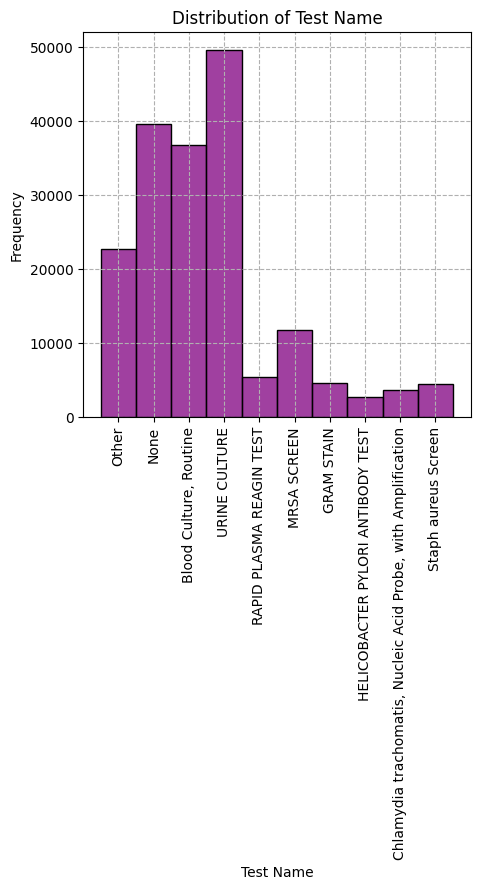

In [88]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['test_name'], bins=50, kde=False, color='purple', edgecolor = 'black')
plt.xlabel('Test Name')
plt.ylabel('Frequency')
plt.title('Distribution of Test Name')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [89]:
df.ab_name.value_counts()

ab_name
AMPICILLIN            5008
ERYTHROMYCIN          2581
CEFAZOLIN              851
PENICILLIN G           716
TRIMETHOPRIM/SULFA     623
GENTAMICIN             332
NITROFURANTOIN          82
VANCOMYCIN              27
CLINDAMYCIN             15
OXACILLIN                5
TETRACYCLINE             3
CEFTRIAXONE              3
TOBRAMYCIN               1
LEVOFLOXACIN             1
Name: count, dtype: int64

In [90]:
df.ab_name.isna().sum()

170429

In [91]:
df = generic_util_instance.replace_nan(df, 'ab_name', 'None')
df = generic_util_instance.replace_column_value(df, 'ab_name', 100, 'Other')
df.ab_name.value_counts()

ab_name
None                  170429
AMPICILLIN              5008
ERYTHROMYCIN            2581
CEFAZOLIN                851
PENICILLIN G             716
TRIMETHOPRIM/SULFA       623
GENTAMICIN               332
Other                    137
Name: count, dtype: int64

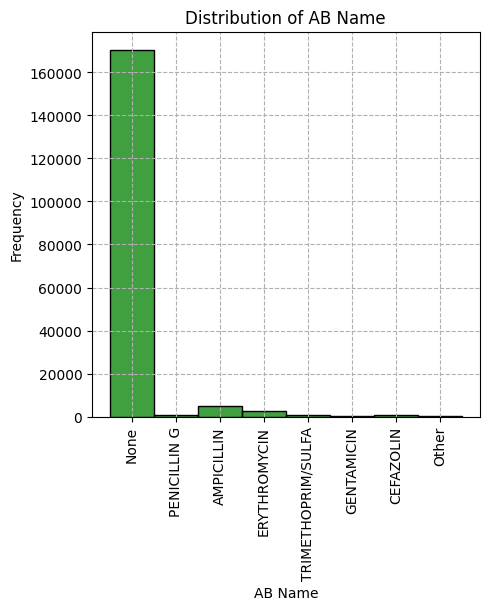

In [92]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['ab_name'], bins=50, kde=False, color='green', edgecolor = 'black')
plt.xlabel('AB Name')
plt.ylabel('Frequency')
plt.title('Distribution of AB Name')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [93]:
df.curr_service.value_counts()

curr_service
MED      83739
SURG     15094
CMED     14859
OBS      10550
NMED     10068
ORTHO     9936
NSURG     7032
TRAUM     5192
OMED      4671
CSURG     4589
GYN       3210
VSURG     2915
GU        2357
PSYCH     2355
TSURG     1838
PSURG     1737
ENT        514
DENT        11
EYE         10
Name: count, dtype: int64

In [94]:
df.curr_service.isna().sum()

0

In [95]:
df = generic_util_instance.replace_column_value(df, 'curr_service', 1000, 'Other')
df.curr_service.value_counts()

curr_service
MED      83739
SURG     15094
CMED     14859
OBS      10550
NMED     10068
ORTHO     9936
NSURG     7032
TRAUM     5192
OMED      4671
CSURG     4589
GYN       3210
VSURG     2915
GU        2357
PSYCH     2355
TSURG     1838
PSURG     1737
Other      535
Name: count, dtype: int64

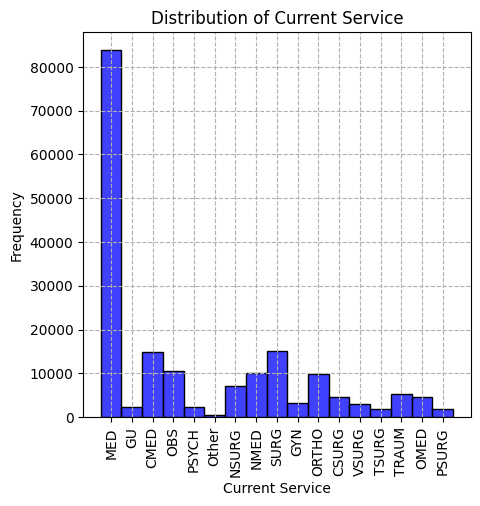

In [96]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['curr_service'], bins=50, kde=False, color='blue', edgecolor = 'black')
plt.xlabel('Current Service')
plt.ylabel('Frequency')
plt.title('Distribution of Current Service')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xticks(rotation=90)
plt.show()

In [97]:
df.dtypes

admission_type           object
admission_location       object
discharge_location       object
insurance                object
language                 object
marital_status           object
race                     object
hospital_expire_flag      int64
los_admission           float64
gender                   object
anchor_age                int64
eventtype                object
drg_type                 object
drg_code                 object
medication               object
event_txt                object
drug                     object
route                    object
org_name                 object
test_name                object
ab_name                  object
curr_service             object
dtype: object

In [101]:
for column in df.columns:
    if column in ['hospital_expire_flag', 'los_admission', 'anchor_age', 'drg_code']:
        try:
            df[column] = df[column].astype('float64')
        except Exception as ex:
            pass
    else:
        df[column] = df[column].astype('string')

In [102]:
df.dtypes

admission_type          string[python]
admission_location      string[python]
discharge_location      string[python]
insurance               string[python]
language                string[python]
marital_status          string[python]
race                    string[python]
hospital_expire_flag           float64
los_admission                  float64
gender                  string[python]
anchor_age                     float64
eventtype               string[python]
drg_type                string[python]
drg_code                       float64
medication              string[python]
event_txt               string[python]
drug                    string[python]
route                   string[python]
org_name                string[python]
test_name               string[python]
ab_name                 string[python]
curr_service            string[python]
dtype: object

####Correlation

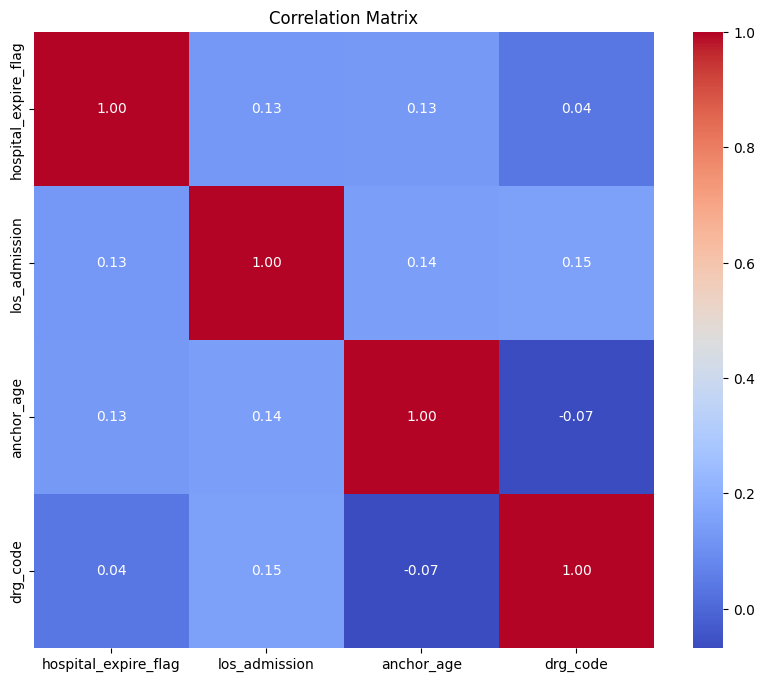

In [103]:
for column in df.columns:
    if column in ['hospital_expire_flag', 'los_admission', 'anchor_age', 'drg_code']:
        try:
            df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except Exception as ex:
            print(f"Error converting column {column}: {ex}")

corr_matrix = df.select_dtypes(include=['number']).corr()  # Select only numeric columns for correlation

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

####Transformation Pipeline and Test set

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df.drop('los_admission', axis=1)
y = df['los_admission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Creating a preprocessor pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape


((144541, 3), (36136, 3))

### Selecting and Training a Model

#### Training and Evaluating on the Training Set

#####Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg_scores = cross_val_score(lin_reg, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
lin_reg_rmse_scores = (-lin_reg_scores) ** 0.5

print("Linear Regression RMSE Scores:", lin_reg_rmse_scores)
print("Linear Regression Mean RMSE:", lin_reg_rmse_scores.mean())


Linear Regression RMSE Scores: [6.22089374 5.98019799 5.98013035 5.67559192 6.02982503]
Linear Regression Mean RMSE: 5.977327804922216


#####Decision Tree

In [106]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg_scores = cross_val_score(tree_reg, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
tree_reg_rmse_scores = (-tree_reg_scores) ** 0.5

print("Decision Tree RMSE Scores:", tree_reg_rmse_scores)
print("Decision Tree Mean RMSE:", tree_reg_rmse_scores.mean())


Decision Tree RMSE Scores: [6.11915896 5.99881979 6.24767527 5.77931552 5.9876663 ]
Decision Tree Mean RMSE: 6.0265271680597845


#####Random Forest

In [107]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg_scores = cross_val_score(forest_reg, X_train_transformed, y_train, cv=3, scoring='neg_mean_squared_error')
forest_reg_rmse_scores = (-forest_reg_scores) ** 0.5

print("Random Forest RMSE Scores:", forest_reg_rmse_scores)
print("Random Forest Mean RMSE:", forest_reg_rmse_scores.mean())


Random Forest RMSE Scores: [5.83676008 5.81049469 5.75927238]
Random Forest Mean RMSE: 5.802175717468349


####Fine-Tuning Models using Grid Search and Random Search

#####Grid Search for Random Forest

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg_instance = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)


In [115]:
grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [116]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [117]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [118]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

6.01762439228459 {'max_features': 2, 'n_estimators': 3}
5.854346499549914 {'max_features': 2, 'n_estimators': 10}
5.818157122317092 {'max_features': 2, 'n_estimators': 30}
6.031571493010169 {'max_features': 4, 'n_estimators': 3}
5.867886469159526 {'max_features': 4, 'n_estimators': 10}
5.82638064711297 {'max_features': 4, 'n_estimators': 30}
6.031571493010169 {'max_features': 6, 'n_estimators': 3}
5.867886469159526 {'max_features': 6, 'n_estimators': 10}
5.82638064711297 {'max_features': 6, 'n_estimators': 30}
6.031571493010169 {'max_features': 8, 'n_estimators': 3}
5.867886469159526 {'max_features': 8, 'n_estimators': 10}
5.82638064711297 {'max_features': 8, 'n_estimators': 30}
6.055690964588434 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
6.039348849742117 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
6.156979975526625 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
6.155003117972953 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
6.

In [119]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.331066,0.056871,0.054884,0.027746,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-35.943947,-37.360042,-35.331421,-36.211803,0.849563,9,-21.862975,-22.841494,-22.153619,-22.286029,0.410304
1,0.851118,0.015405,0.114617,0.001150,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-34.701066,-34.336569,-33.782484,-34.273373,0.377662,5,-20.485102,-20.899953,-20.830287,-20.738447,0.181386
2,3.039609,0.740935,0.368500,0.040904,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-34.362810,-33.750833,-33.439214,-33.850952,0.383645,1,-20.067498,-20.550148,-20.444897,-20.354181,0.207220
3,0.322363,0.004396,0.035859,0.001221,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-36.215155,-37.678977,-35.245433,-36.379855,1.000293,10,-21.857042,-22.893071,-22.370609,-22.373574,0.422962
4,1.479379,0.237317,0.142248,0.014995,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-34.936802,-34.613628,-33.745844,-34.432092,0.502866,6,-20.500434,-20.953238,-20.903558,-20.785743,0.202761
5,3.460912,0.359582,0.350221,0.024376,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-34.448756,-33.991481,-33.399898,-33.946711,0.429363,2,-20.083462,-20.561742,-20.490440,-20.378548,0.210678
6,0.457339,0.077886,0.041163,0.004483,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-36.215155,-37.678977,-35.245433,-36.379855,1.000293,10,-21.857042,-22.893071,-22.370609,-22.373574,0.422962
7,1.071747,0.017278,0.114447,0.004793,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-34.936802,-34.613628,-33.745844,-34.432092,0.502866,6,-20.500434,-20.953238,-20.903558,-20.785743,0.202761
8,3.563830,0.513171,0.353735,0.036764,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-34.448756,-33.991481,-33.399898,-33.946711,0.429363,2,-20.083462,-20.561742,-20.490440,-20.378548,0.210678
9,0.323018,0.008565,0.034588,0.000246,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-36.215155,-37.678977,-35.245433,-36.379855,1.000293,10,-21.857042,-22.893071,-22.370609,-22.373574,0.422962


#####Random Search for Random Forest

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)


In [125]:
rnd_search.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e455270a0b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e45527e9b70>},
                   random_state=42, scoring='neg_mean_squared_error')

In [126]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.800600233030682 {'max_features': 7, 'n_estimators': 180}
5.848412177692092 {'max_features': 5, 'n_estimators': 15}
5.806883371657463 {'max_features': 3, 'n_estimators': 72}
5.829263419936951 {'max_features': 5, 'n_estimators': 21}
5.801438341167454 {'max_features': 7, 'n_estimators': 122}
5.8054678091154175 {'max_features': 3, 'n_estimators': 75}
5.802280899238292 {'max_features': 3, 'n_estimators': 88}
5.802264935595804 {'max_features': 5, 'n_estimators': 100}
5.801314729955724 {'max_features': 3, 'n_estimators': 150}
6.118818212079594 {'max_features': 5, 'n_estimators': 2}


#####Analysing the best model

In [127]:

best_forest_reg = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_forest_reg.fit(X_train_transformed, y_train)


from sklearn.metrics import mean_squared_error

y_pred = best_forest_reg.predict(X_test_transformed)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Test RMSE of the best model:", test_rmse)


Test RMSE of the best model: 5.789925111258515


In [128]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test_transformed)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [129]:
final_rmse

5.789925111258515

In [131]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test, final_predictions)
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([5.43860829, 6.12111145])

In [132]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(5.438608293162803, 6.121111453119002)

In [133]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(5.438620440795705, 6.1211006599240765)

In [136]:
df.to_csv('/content/drive/MyDrive/ch_03_dataset.csv', index=False)